Part A — Python EDA & Trends

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

df = pd.read_csv('hour.csv')  

# Convert date to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

print(df.head())



   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [142]:
# Normalized features check (0-1 range)
normalized_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in normalized_cols:
    print(f"{col} min: {df[col].min()}, max: {df[col].max()}")


temp min: 0.02, max: 1.0
atemp min: 0.0, max: 1.0
hum min: 0.0, max: 1.0
windspeed min: 0.0, max: 0.8507


In [156]:
# Summary
df.describe()
df.info()
# Grouped summaries
df.groupby('workingday')['cnt'].describe()
df.groupby('season')['cnt'].mean()
df.groupby('hr')['cnt'].mean()
df.groupby('weekday')['cnt'].mean()
df['dteday'].describe()
df['temp'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

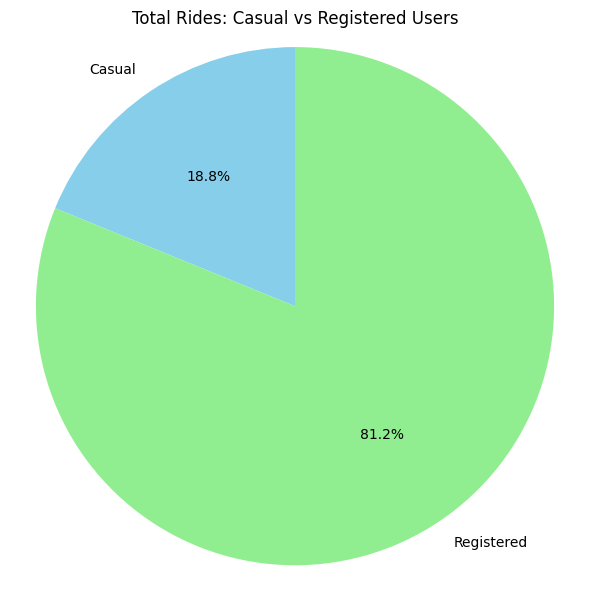

In [ ]:

totals = df[['casual', 'registered']].sum()

plt.figure(figsize=(6, 6))
plt.pie(totals, labels=['Casual', 'Registered'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Total Rides: Casual vs Registered Users')
plt.axis('equal')  
plt.tight_layout()
plt.show()

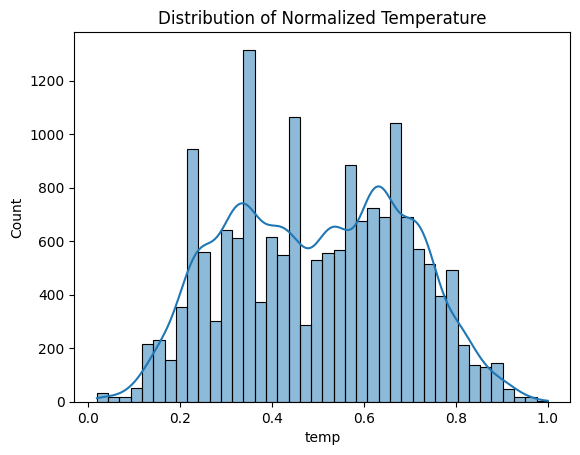

In [98]:
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of Normalized Temperature')
plt.show()


In [116]:
# To convert normalized temp to celsius fahrenheit
temp_norm = 0.38

# 47(-8 to 39) is the range for celsius (checked the documentation) then adjust for minimum of -8 
temp_C = temp_norm * 47 - 8
print(f"Normalized temp {temp_norm} corresponds to {temp_C:.2f}°C")

# multiply range and minimum by 1.8  
temp_F = temp_norm * 84.6 + 17.6
print(f"Normalized temp {temp_norm} corresponds to {temp_F:.2f}°F")


Normalized temp 0.38 corresponds to 9.86°C
Normalized temp 0.38 corresponds to 49.75°F


----------------------------------------------

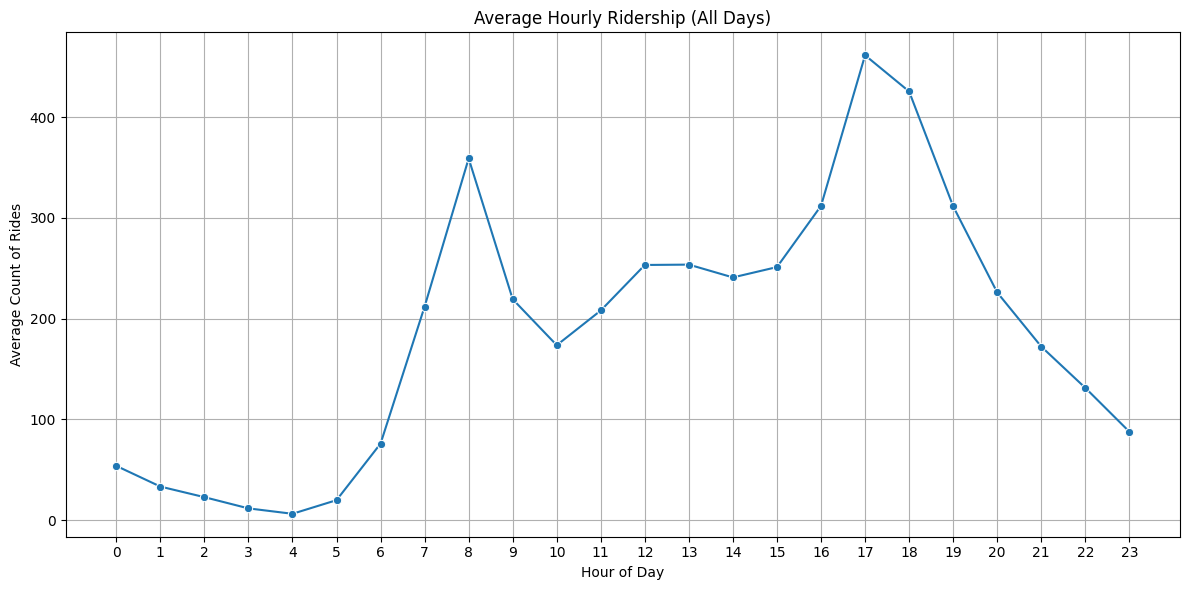

In [99]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker='o')
plt.title('Average Hourly Ridership (All Days)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/7n/rj4gbkk13_1f9n1qf54j12gh0000gp/T/ipykernel_39921/2635046691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='workingday', y='cnt', palette={'0': '#FF6F61', '1': '#6BAED6'})


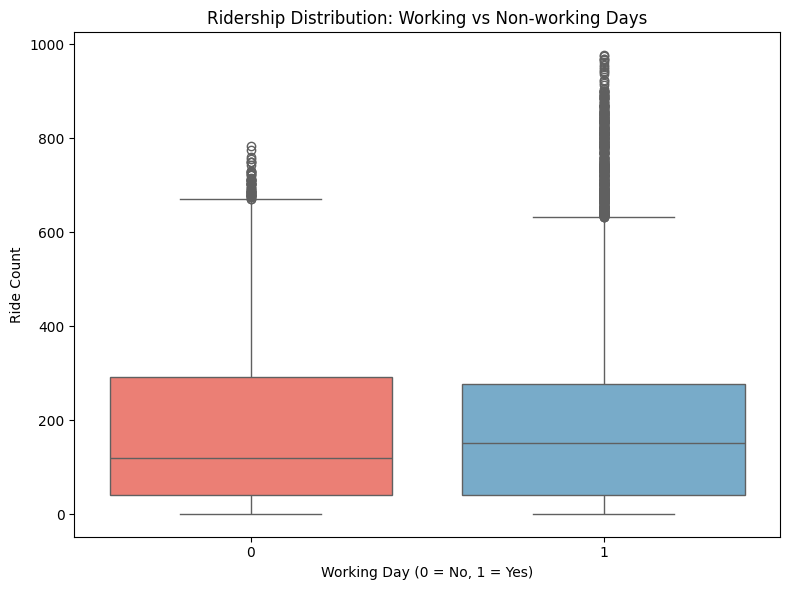

In [100]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='workingday', y='cnt', palette={'0': '#FF6F61', '1': '#6BAED6'})
plt.title('Ridership Distribution: Working vs Non-working Days')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Ride Count')
plt.tight_layout()
plt.show()


/var/folders/7n/rj4gbkk13_1f9n1qf54j12gh0000gp/T/ipykernel_39921/2009298669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=grouped, palette=colors)
/var/folders/7n/rj4gbkk13_1f9n1qf54j12gh0000gp/T/ipykernel_39921/2009298669.py:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='weathersit', y='cnt', data=grouped, palette=colors)


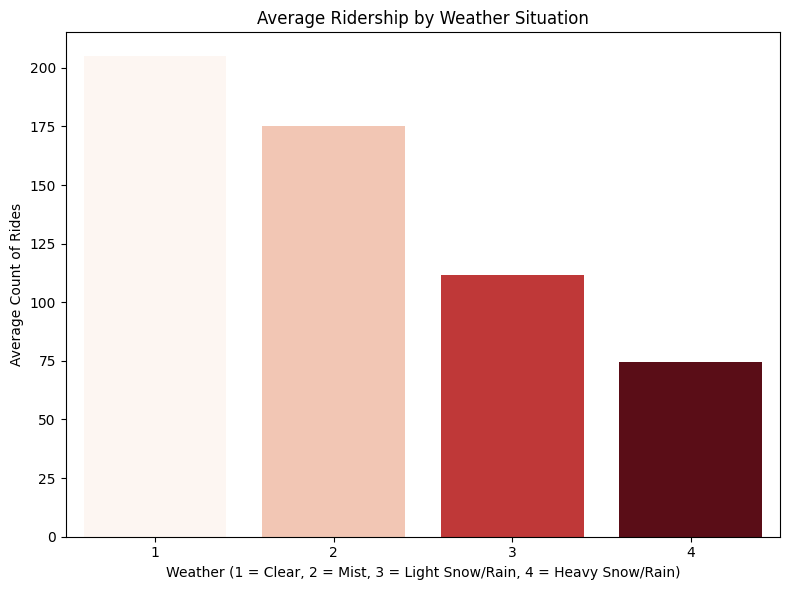

In [101]:
# Compute average ride count by weather
grouped = df.groupby('weathersit')['cnt'].mean().reset_index()

# Normalize ride counts for colormap
norm = plt.Normalize(grouped['cnt'].min(), grouped['cnt'].max())
colors = plt.cm.Reds_r(norm(grouped['cnt']))  

# Bar char with color scaling
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=grouped, palette=colors)

plt.title('Average Ridership by Weather Situation')
plt.xlabel('Weather (1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Snow/Rain)')
plt.ylabel('Average Count of Rides')
plt.tight_layout()
plt.show()


/var/folders/7n/rj4gbkk13_1f9n1qf54j12gh0000gp/T/ipykernel_39921/1083526983.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


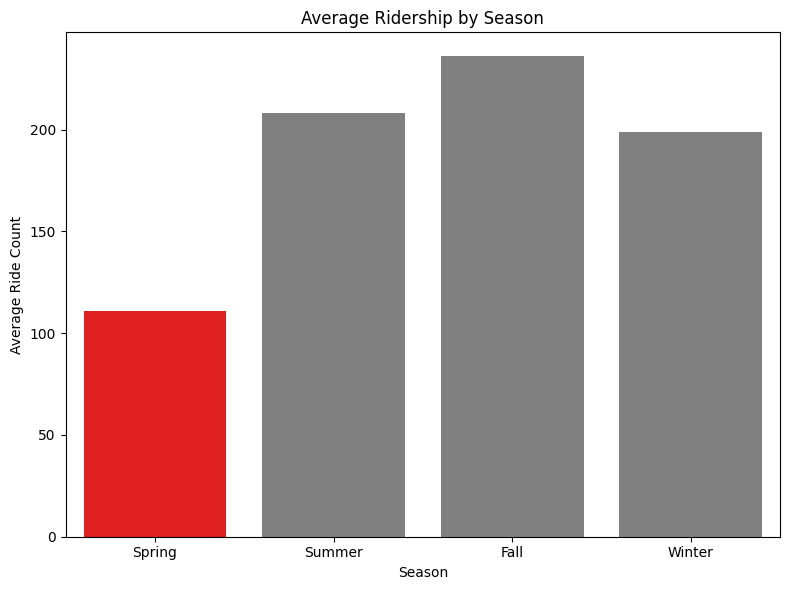

In [145]:
# Season labels
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_labels)

# Step 2: Define correct season order
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Step 3: Compute mean ride count per season, respecting order
mean_counts = (
    df.groupby('season_label')['cnt']
    .mean()
    .reindex(season_order)
    .reset_index()
)

# Step 4: Set colors — highlight Spring only
bar_colors = ['red' if season == 'Spring' else 'gray' for season in mean_counts['season_label']]

# Step 5: Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=mean_counts,
    x='season_label',
    y='cnt',
    palette=bar_colors,
    order=season_order
)
plt.title('Average Ridership by Season')
plt.xlabel('Season')
plt.ylabel('Average Ride Count')
plt.tight_layout()
plt.show()

Part B — Hypothesis Testing

Q1 — Commuter pattern

Hypotheses:

Null hypothesis (H0): Mean hourly rides on working and non-working days are equal.

Alternative hypothesis (H1): Mean hourly rides on working and non-working days differ.

In [ ]:
from scipy.stats import ttest_ind

# Split into working and non-working days
working = df[df['workingday'] == 1]['cnt']
non_working = df[df['workingday'] == 0]['cnt']

# Welch's t-test
t_stat, p_val = stats.ttest_ind(working, non_working, equal_var=False)

# 95% CI for difference in means
mean_diff = working.mean() - non_working.mean()
se_diff = np.sqrt(working.var(ddof=1)/len(working) + non_working.var(ddof=1)/len(non_working))
df_deg = (working.var(ddof=1)/len(working) + non_working.var(ddof=1)/len(non_working))**2 / (
    (working.var(ddof=1)**2)/((len(working)**2)*(len(working)-1)) +
    (non_working.var(ddof=1)**2)/((len(non_working)**2)*(len(non_working)-1))
)
ci_low = mean_diff - stats.t.ppf(0.975, df_deg) * se_diff
ci_high = mean_diff + stats.t.ppf(0.975, df_deg) * se_diff

# Results
print(f"Welch’s t-test statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")
print(f"95% CI for difference in means: ({ci_low:.2f}, {ci_high:.2f})")


Welch’s t-test statistic: 4.095
p-value: 0.00004
95% CI for difference in means: (6.15, 17.45)


There is a statistically and practically significant difference in hourly ride counts between working and non-working days. On average, working days see 6 to 17 more rides per hour, which can translate to hundreds of additional daily rides.
This pattern reflects likely commuter behavior and should guide weekday-focused operational planning and targeted pricing or promotional strategies.

Q2 — Multi-group comparison

Hypotheses:

Null hypothesis (H0): All seasonal means are equal (no difference in average hourly rides).

Alternative hypothesis (H1): At least one seasonal mean is different.

In [ ]:
# Group cnt values by season
spring = df[df['season'] == 1]['cnt']
summer = df[df['season'] == 2]['cnt']
fall   = df[df['season'] == 3]['cnt']
winter = df[df['season'] == 4]['cnt']
# One-way ANOVA
f_stat, p_val = stats.f_oneway(spring, summer, fall, winter)

# Results
print(f"One-way ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.5f}")



One-way ANOVA F-statistic: 409.181
p-value: 0.00000


Average hourly rides do significantly differ between at least some seasons.
The size of these differences with such a small p-value have clear operational, financial, and strategic implications for pricing, resource allocation, and customer engagement. making it not only statistically significant but practically significant aswell.

The appropriate post-hoc approch would be a Tukey's HDS for pairwise comparisons between seasons to determine which specific pairs of seasons differ significantly. This would allow stakeholders to focus on seasons that may be underperforming.

In [105]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

rides = df['cnt']
seasons = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# TukeyHSD
tukey = pairwise_tukeyhsd(endog=rides, groups=seasons, alpha=0.05)
print(tukey)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  Fall Spring -124.9017    0.0 -134.5431 -115.2603   True
  Fall Summer  -27.6722    0.0  -37.2192  -18.1252   True
  Fall Winter  -37.1474    0.0  -46.7946  -27.5001   True
Spring Summer   97.2295    0.0    87.542   106.917   True
Spring Winter   87.7543    0.0    77.968   97.5406   True
Summer Winter   -9.4752 0.0582  -19.1685    0.2181  False
---------------------------------------------------------


Part C — Simulated A/B Test 

In [ ]:
np.random.seed(1)  

def filter_data(df):
    return df[
        (df['workingday'] == 1) &
        (df['hr'].isin([17, 18, 19])) &
        (df['weathersit'].isin([1, 2])) &
        (df['hum'] <= 0.70)
    ]

# Spliting into pre and post 
pre = filter_data(df[(df['dteday'] >= '2012-08-04') & (df['dteday'] <= '2012-08-31')])
post = filter_data(df[(df['dteday'] >= '2012-09-01') & (df['dteday'] <= '2012-09-28')])

In [ ]:
def create_paired_groups(pre, post):
    paired_pre = []
    paired_post = []
    balance_info = []

    # Looping over each (weekday, hr) in pre
    for (day, hour), _ in pre.groupby(['weekday', 'hr']):
        pre_slot = pre[(pre['weekday'] == day) & (pre['hr'] == hour)].sample(frac=1)
        post_slot = post[(post['weekday'] == day) & (post['hr'] == hour)].sample(frac=1)

        n = min(len(pre_slot), len(post_slot))
        if n == 0:
            continue

        # Appending paired samples
        paired_pre.append(pre_slot.iloc[:n])
        paired_post.append(post_slot.iloc[:n])

        balance_info.append({
            'weekday': day,
            'hour': hour,
            'pre_count': len(pre_slot),
            'post_count': len(post_slot),
            'paired_count': n
        })

    pre_combined = pd.concat(paired_pre).reset_index(drop=True)
    post_combined = pd.concat(paired_post).reset_index(drop=True)
    balance_df = pd.DataFrame(balance_info).sort_values(['weekday', 'hour']).reset_index(drop=True)

    return pre_combined, post_combined, balance_df

In [108]:
groupa, groupb, balance_df = create_paired_groups(pre, post)

print("Balance Table (samples retained per weekday-hour slot):")
print(balance_df)

Balance Table (samples retained per weekday-hour slot):
    weekday  hour  pre_count  post_count  paired_count
0         1    17          4           3             3
1         1    18          3           2             2
2         1    19          3           2             2
3         2    17          3           3             3
4         2    18          4           2             2
5         2    19          3           3             3
6         3    17          3           4             3
7         3    18          3           3             3
8         3    19          3           4             3
9         4    17          4           4             4
10        4    18          4           4             4
11        4    19          4           3             3
12        5    17          4           4             4
13        5    18          4           4             4
14        5    19          4           3             3


Confirmed fair comparison by matching each pre/post observation by (weekday × hour), keeping equal counts per slot. Weather composition was also consistent across groups. This ensures the observed change in ridership is not explained by differences in time or conditions.

In [ ]:
# Paired t-test
alpha = 0.05
result = pg.ttest(x=groupa['cnt'], y=groupb['cnt'], confidence=1-alpha, paired=True)

print("\nPaired t-test results:")
print(result)


Paired t-test results:
               T  dof alternative     p-val             CI95%   cohen-d  \
T-test -3.696756   45   two-sided  0.000591  [-63.57, -18.73]  0.305238   

          BF10     power  
T-test  46.883  0.526335  


In [110]:
#For practical effect
mean_diff = (groupb['cnt'] - groupa['cnt']).mean()
print(f"Mean difference: {mean_diff:.2f} rentals")


Mean difference: 41.15 rentals


The average increase of 41.15 bike rentals per hour (~15% jump) during commute hours is practically significant, even though the standardized effect size (d = 0.3) is modest.

This change could meaningfully affect staffing requirements, fleet sizing and rebalancing